In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML Final Project/5g_network_data.csv")

# Show basic info
print("Shape of dataset:", df.shape)
df.info()

# Preview the data
df.head()

Shape of dataset: (50000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 50000 non-null  object 
 1   Location                  50000 non-null  object 
 2   Signal Strength (dBm)     50000 non-null  float64
 3   Download Speed (Mbps)     50000 non-null  float64
 4   Upload Speed (Mbps)       50000 non-null  float64
 5   Latency (ms)              50000 non-null  float64
 6   Jitter (ms)               50000 non-null  float64
 7   Network Type              50000 non-null  object 
 8   Device Model              50000 non-null  object 
 9   Carrier                   50000 non-null  object 
 10  Band                      50000 non-null  object 
 11  Battery Level (%)         50000 non-null  int64  
 12  Temperature (°C)          50000 non-null  float64
 13  Connected Duration (min)  50000

,Timestamp,Location,Signal Strength (dBm),Download Speed (Mbps),Upload Speed (Mbps),Latency (ms),Jitter (ms),Network Type,Device Model,Carrier,...,Battery Level (%),Temperature (°C),Connected Duration (min),Handover Count,Data Usage (MB),Video Streaming Quality,VoNR Enabled,Network Congestion Level,Ping to Google (ms),Dropped Connection
0,59:51.1,San Francisco,-108.6,714.94,60.41,10.0,4.09,5G NSA,iPhone 14,AT&T,...,99,35.5,14,1,97.40,4,False,High,27.9,True
1,49:51.1,San Francisco,-71.5,686.69,148.70,12.3,1.50,4G,Pixel 7,AT&T,...,67,22.0,51,4,143.23,3,True,Medium,22.2,False
2,39:51.1,Chennai,-67.5,796.34,136.33,19.9,1.22,5G NSA,iPhone 14,Airtel,...,77,36.1,45,2,179.15,5,False,Low,75.5,False
3,29:51.1,New York,-73.3,208.56,68.59,12.2,4.94,4G,Pixel 7,T-Mobile,...,25,39.3,48,0,128.87,4,False,High,87.5,False
4,19:51.1,Kolkata,-93.2,409.85,137.23,6.3,2.94,5G NSA,Galaxy S23,BSNL,...,51,22.7,54,4,156.91,1,True,Medium,32.5,True


In [23]:
# Confirm no missing values
print("\nMissing value count:")
print(df.isnull().sum())


Missing value count:
Timestamp                   0
Location                    0
Signal Strength (dBm)       0
Download Speed (Mbps)       0
Upload Speed (Mbps)         0
Latency (ms)                0
Jitter (ms)                 0
Network Type                0
Device Model                0
Carrier                     0
Band                        0
Battery Level (%)           0
Temperature (°C)            0
Connected Duration (min)    0
Handover Count              0
Data Usage (MB)             0
Video Streaming Quality     0
VoNR Enabled                0
Network Congestion Level    0
Ping to Google (ms)         0
Dropped Connection          0
dtype: int64


In [24]:
# Drop non-informative columns
df.drop(columns=['Timestamp', 'Location'], inplace=True)

print("Remaining columns:", df.columns.tolist())

Remaining columns: ['Signal Strength (dBm)', 'Download Speed (Mbps)', 'Upload Speed (Mbps)', 'Latency (ms)', 'Jitter (ms)', 'Network Type', 'Device Model', 'Carrier', 'Band', 'Battery Level (%)', 'Temperature (°C)', 'Connected Duration (min)', 'Handover Count', 'Data Usage (MB)', 'Video Streaming Quality', 'VoNR Enabled', 'Network Congestion Level', 'Ping to Google (ms)', 'Dropped Connection']


In [25]:
# Map target label to numeric
congestion_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Network Congestion Level'] = df['Network Congestion Level'].map(congestion_map)

# Confirm mapping
df['Network Congestion Level'].value_counts()

,count
Network Congestion Level,
0,16791
1,16732
2,16477


In [26]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns to encode
cat_cols = ['Network Type', 'Device Model', 'Band', 'VoNR Enabled', 'Dropped Connection']

# Encode each categorical column
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save encoder for inverse transform if needed

print("Encoded categorical columns.")

Encoded categorical columns.


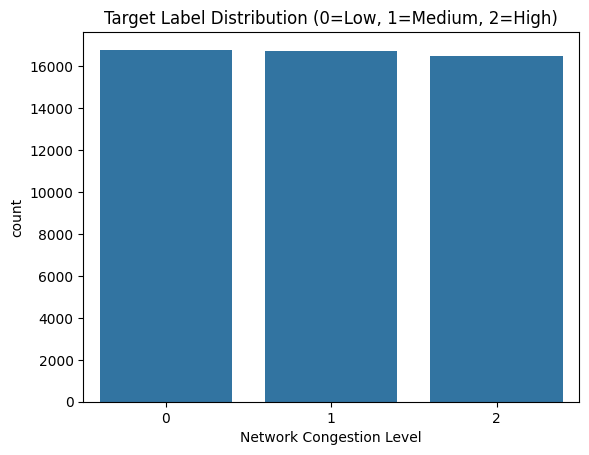

In [27]:
# Recheck data types
df.dtypes

# Show class distribution of target
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Network Congestion Level', data=df)
plt.title("Target Label Distribution (0=Low, 1=Medium, 2=High)")
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['Network Congestion Level', 'Carrier'])  # Keep Carrier for FL
y = df['Network Congestion Level']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easy handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add target and carrier back for convenience
X_scaled['Network Congestion Level'] = y
X_scaled['Carrier'] = df['Carrier'].values

X_scaled.head()

,Signal Strength (dBm),Download Speed (Mbps),Upload Speed (Mbps),Latency (ms),Jitter (ms),Network Type,Device Model,Band,Battery Level (%),Temperature (°C),Connected Duration (min),Handover Count,Data Usage (MB),Video Streaming Quality,VoNR Enabled,Ping to Google (ms),Dropped Connection,Network Congestion Level,Carrier
0,-1.641356,0.628798,-0.648882,-0.090326,1.079956,-0.002675,1.415608,1.116898,1.706288,0.422590,-0.932939,-0.708332,-1.113439,0.706263,-1.002202,-1.040942,0.998761,2,AT&T
1,0.921242,0.520324,1.699854,0.327475,-0.749048,-1.229752,0.708518,-0.893744,0.477108,-1.448082,1.244152,1.407777,-0.788375,0.000014,0.997802,-1.260314,-1.001241,1,AT&T
2,1.197532,0.941355,1.370781,1.708034,-0.946778,-0.002675,1.415608,1.116898,0.861227,0.505731,0.891110,-0.002963,-0.533601,1.412513,-1.002202,0.791007,-1.001241,0,Airtel
3,0.796911,-1.315588,-0.431273,0.309310,1.680209,-1.229752,0.708518,0.446684,-1.136190,0.949150,1.067631,-1.413702,-0.890228,0.706263,-1.002202,1.252843,-1.001241,2,T-Mobile
4,-0.577636,-0.542680,1.394723,-0.762440,0.267850,-0.002675,-0.705662,-0.223530,-0.137481,-1.351084,1.420673,1.407777,-0.691345,-1.412484,0.997802,-0.863905,0.998761,1,BSNL


In [29]:
from sklearn.model_selection import train_test_split

# Separate features and target again (clean)
features = X_scaled.drop(columns=['Network Congestion Level', 'Carrier'])
target = X_scaled['Network Congestion Level']

# Stratified split to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (40000, 17)
Test size: (10000, 17)


In [30]:
from xgboost import XGBClassifier

# Train basic XGBoost model
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.3416
F1 Score (macro): 0.34106981262476194

Classification Report:
              precision    recall  f1-score   support

         Low       0.34      0.37      0.35      3358
      Medium       0.34      0.35      0.35      3347
        High       0.34      0.31      0.32      3295

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000



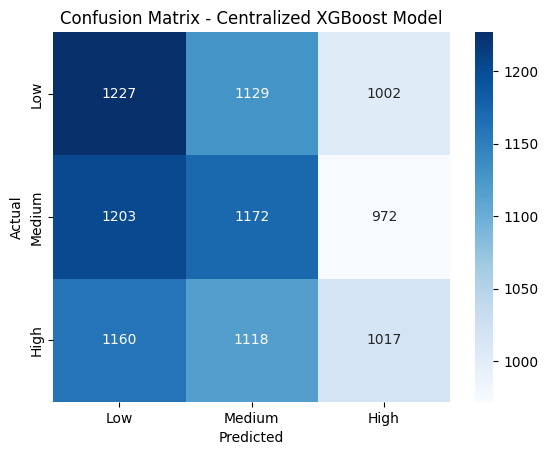

In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = xgb.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Centralized XGBoost Model")
plt.show()

In [32]:
centralized_results = {
    "accuracy": accuracy_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred, average='macro'),
    "report": classification_report(y_test, y_pred, output_dict=True)
}

In [33]:
# Group data by Carrier
clients = {}
carriers = X_scaled['Carrier'].unique()

for carrier in carriers:
    client_data = X_scaled[X_scaled['Carrier'] == carrier]
    X_client = client_data.drop(columns=['Network Congestion Level', 'Carrier']).values
    y_client = client_data['Network Congestion Level'].values
    clients[carrier] = (X_client, y_client)

print("Simulated clients:", list(clients.keys()))

Simulated clients: ['AT&T', 'Airtel', 'T-Mobile', 'BSNL', 'Vi', 'Jio', 'Verizon']


In [34]:
#pip install flwr

#!pip install -U "flwr[simulation]"

In [35]:
import flwr as fl
import lightgbm as lgb
from sklearn.metrics import f1_score

import numpy as np
np.float_ = np.float64

# Create a class for each client simulation
class FLClient(fl.client.NumPyClient):
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train, self.y_train = X_train, y_train
        self.X_test, self.y_test = X_test, y_test
        self.model = lgb.LGBMClassifier(n_estimators=100)

    def get_parameters(self, config):
        return [self.model.booster_.dump_model() if hasattr(self.model, 'booster_') else []]

    def fit(self, parameters, config):
        self.model.fit(self.X_train, self.y_train)
        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        preds = self.model.predict(self.X_test)
        f1 = f1_score(self.y_test, preds, average='macro')
        return float(f1), len(self.X_test), {"f1_score": f1}

In [36]:
# ---------------------------
# STEP 1: Define Clients
# ---------------------------
train_clients = ["Jio", "Airtel", "BSNL", "Vi", "T-Mobile", "AT&T"]
test_client = "Verizon"

# Filter client data
train_client_data = {c: clients[c] for c in train_clients}
test_X, test_y = clients[test_client]

print("✅ Training on:", train_clients)
print("🧪 Testing generalization on unseen client:", test_client)


✅ Training on: ['Jio', 'Airtel', 'BSNL', 'Vi', 'T-Mobile', 'AT&T']
🧪 Testing generalization on unseen client: Verizon


In [37]:
# ---------------------------
# STEP 2: Redefine Flower Client Class
# ---------------------------
import flwr as fl
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

class FLClient(fl.client.NumPyClient):
    def __init__(self, X_train, y_train, X_val, y_val):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.model = lgb.LGBMClassifier(n_estimators=100)

    def get_parameters(self, config):
        return self.model.booster_.dump_model() if hasattr(self.model, 'booster_') else []

    def fit(self, parameters, config):
        self.model.fit(self.X_train, self.y_train)
        return self.get_parameters(config), len(self.X_train), {}

    def evaluate(self, parameters, config):
        preds = self.model.predict(self.X_val)
        f1 = f1_score(self.y_val, preds, average='macro')
        return float(f1), len(self.X_val), {"f1_score": f1}


In [38]:
# ---------------------------
# STEP 3: Define Client Generator Function
# ---------------------------
def client_fn(cid: str) -> fl.client.Client:
    carrier = train_clients[int(cid)]
    X, y = train_client_data[carrier]
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    return FLClient(X_train, y_train, X_val, y_val)


In [40]:
# ---------------------------
# STEP 4: Run FL Simulation (Flower)
# ---------------------------
fl.simulation.start_simulation(
    client_fn=client_fn,
    num_clients=len(train_clients),
    config=fl.server.ServerConfig(num_rounds=5),
    strategy=fl.server.strategy.FedAvg(),
)



	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=5, no round_timeout
2025-07-20 11:14:14,738	INFO worker.py:1771 -- Started a local Ray instance.
INFO :      Flower VCE: Ray initialized with resources

(ClientAppActor pid=1587) [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
(ClientAppActor pid=1587) You can set `force_row_wise=true` to remove the overhead.
(ClientAppActor pid=1587) And if memory is not enough, you can set `force_col_wise=true`.
(ClientAppActor pid=1587) [LightGBM] [Info] Total Bins 2144
(ClientAppActor pid=1587) [LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 17
(ClientAppActor pid=1587) [LightGBM] [Info] Start training from score -1.100106
(ClientAppActor pid=1587) [LightGBM] [Info] Start training from score -1.092512
(ClientAppActor pid=1587) [LightGBM] [Info] Start training from score -1.103250


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1587) [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
(ClientAppActor pid=1587) You can set `force_row_wise=true` to remove the overhead.
(ClientAppActor pid=1587) And if memory is not enough, you can set `force_col_wise=true`.
(ClientAppActor pid=1587) [LightGBM] [Info] Total Bins 2151
(ClientAppActor pid=1587) [LightGBM] [Info] Number of data points in the train set: 5001, number of used features: 17
(ClientAppActor pid=1587) [LightGBM] [Info] Start training from score -1.067314
(ClientAppActor pid=1587) [LightGBM] [Info] Start training from score -1.126595
(ClientAppActor pid=1587) [LightGBM] [Info] Start training from score -1.102820


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1585) [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000572 seconds. [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(ClientAppActor pid=1585) You can set `force_row_wise=true` to remove the overhead. [repeated 3x across cluster]
(ClientAppActor pid=1585) And if memory is not enough, you can set `force_col_wise=true`. [repeated 3x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Total Bins 2147 [repeated 3x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Number of data points in the train set: 5004, number of used features: 17 [repeated 3x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Start training from score -1.110069 [repeated 9x across cluster]


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1585) [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000754 seconds. [repeated 8x across cluster]
(ClientAppActor pid=1585) You can set `force_row_wise=true` to remove the overhead. [repeated 8x across cluster]
(ClientAppActor pid=1585) And if memory is not enough, you can set `force_col_wise=true`. [repeated 8x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Total Bins 2147 [repeated 8x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Number of data points in the train set: 5004, number of used features: 17 [repeated 8x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Start training from score -1.110069 [repeated 24x across cluster]


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1585) [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001770 seconds.
(ClientAppActor pid=1585) You can set `force_col_wise=true` to remove the overhead.


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1585) [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004157 seconds.
(ClientAppActor pid=1585) You can set `force_col_wise=true` to remove the overhead.
(ClientAppActor pid=1587) [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds. [repeated 4x across cluster]
(ClientAppActor pid=1587) You can set `force_row_wise=true` to remove the overhead. [repeated 4x across cluster]
(ClientAppActor pid=1587) And if memory is not enough, you can set `force_col_wise=true`. [repeated 4x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Total Bins 2144 [repeated 6x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Number of data points in the train set: 6700, number of used features: 17 [repeated 6x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Start training from score -1.103250 [repeated 18x across cluster]


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1587) [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007685 seconds.
(ClientAppActor pid=1587) You can set `force_col_wise=true` to remove the overhead.


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1585) [LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds. [repeated 5x across cluster]
(ClientAppActor pid=1585) You can set `force_row_wise=true` to remove the overhead. [repeated 5x across cluster]
(ClientAppActor pid=1585) And if memory is not enough, you can set `force_col_wise=true`. [repeated 5x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Total Bins 2147 [repeated 6x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Number of data points in the train set: 5004, number of used features: 17 [repeated 6x across cluster]
(ClientAppActor pid=1585) [LightGBM] [Info] Start training from score -1.110069 [repeated 18x across cluster]


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

(ClientAppActor pid=1585) [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002589 seconds.
(ClientAppActor pid=1585) You can set `force_col_wise=true` to remove the overhead.


ERROR :     Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_client_proxy.py", line 95, in _submit_job
    out_mssg, updated_context = self.actor_pool.get_client_result(
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 401, in get_client_result
    return self._fetch_future_result(cid)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/flwr/simulation/ray_transport/ray_actor.py", line 282, in _fetch_future_result
    res_cid, out_mssg, updated_context = ray.get(
                                         ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/auto_init_hook.py", line 21, in auto_init_wrapper
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ray/_private/client_mode_hook.py", line

In [41]:
# Install flwr with simulation dependencies
#!pip install -U "flwr[simulation]"

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
(ClientAppActor pid=1585) WARNING :   Deprecation Warning: The `client_fn` function must return an instance of `Client`, but an instance of `NumpyClient` was returned. Please use `NumPyClient.to_client()` method to convert it to `Client`.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 8327, number of used features: 17
[LightGBM] [Info] Start training from score -1.088100
[LightGBM] [Info] Start training from score -1.104997
[LightGBM] [Info] Start training from score -1.102824


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📡 Generalization Evaluation on Verizon:
Accuracy: 0.8982826948480845
F1 Score (macro): 0.8983092552098464

Classification Report:
              precision    recall  f1-score   support

         Low       0.88      0.91      0.90      2805
      Medium       0.92      0.88      0.90      2758
        High       0.89      0.90      0.90      2764

    accuracy                           0.90      8327
   macro avg       0.90      0.90      0.90      8327
weighted avg       0.90      0.90      0.90      8327



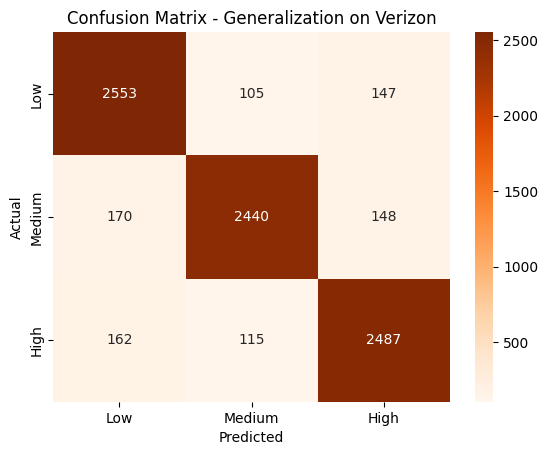

In [42]:
# ---------------------------
# STEP 5: Evaluate Generalization on Unseen Test Client
# ---------------------------
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Re-initialize LightGBM model and test
model = lgb.LGBMClassifier(n_estimators=100)
model.fit(test_X, test_y)  # Fit once to initialize structure
y_pred = model.predict(test_X)

# Evaluation report
print(f"📡 Generalization Evaluation on {test_client}:")
print("Accuracy:", accuracy_score(test_y, y_pred))
print("F1 Score (macro):", f1_score(test_y, y_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(test_y, y_pred, target_names=['Low', 'Medium', 'High']))

# Confusion matrix
cm = confusion_matrix(test_y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Generalization on {test_client}")
plt.show()
